In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

f"Pandas version: {pd.__version__}"

'Pandas version: 2.2.3'

# Dataset: Bußgelder fließender Verkehr 2021 der Stadt Aachen 

Source: Stadt Aachen

License: [Data licence Germany – attribution – Version 2.0](http://www.govdata.de/dl-de/by-2-0)

URL: https://offenedaten.aachen.de/dataset/14a0e75f-b040-41d7-91f3-2d3c33d3ea35/resource/dfd6ff8c-469d-4164-88be-ca38f932c176/download/2021_bussgelder-fliessender-verkehr-geschwindigkeitsubertretungen.csv

URI: https://offenedaten.aachen.de/dataset/bussgelder-fliessender-verkehr-2021-der-stadt-aachen



### What is contained in the dataset?

This dataset includes the Tickets for speeding in Aachen in the year 2021

### Encoding

The file is encoded in *ISO-8859-1* (sometimes referred to as *Latin 1*). Refer to this [list of Python standard encoding](https://docs.python.org/3/library/codecs.html#standard-encodings).

### Format

From the URL we infer that the dataset is provided as a CSV file.

### File header

This is the header of the CSV file:

```
Tattag;Zeit;Tatort;Tatort 2;Tatbestand;Geldbuße
```

### Columns and their meaning

|                  column name                  |          Meaning         |
|:-----:|:------------------------:|
| Tattag| Day of the offence                              |
| Zeit  | Time of day, when the offence was committed         |
| Tatort | Location of the offence |
| Tatort 2 | More information on the location, i.e. the driving direction |
| Tatbestand  | number encoding the exact kind of the offence <br /> (all numbers with the exact offences and the corresponding fine amount are listed [here](https://www.kba.de/DE/Themen/ZentraleRegister/FAER/BT_KAT_OWI/bkat_owi_09_11_2021.pdf;jsessionid=2137F17F4902DEB7DFA7C3EEE3BD1797.live21321?__blob=publicationFile&v=3)   |
|Geldbuße| Fine amount in € |

In [2]:
DATAURL = (
    "https://offenedaten.aachen.de/dataset/14a0e75f-b040-41d7-91f3-2d3c33d3ea35/resource/dfd6ff8c-469d-4164-88be-ca38f932c176/"
    "download/2021_bussgelder-fliessender-verkehr-geschwindigkeitsubertretungen.csv"
)

We first import the full dataset to see what see have:

In [3]:
df = pd.read_csv(
    DATAURL,
    encoding="iso-8859-1",
    sep=";",
)
df.head()

Tattag   Zeit                            Tatort               Tatort 2  \
0  01.01.2021  06:57  Aachen, Turmstr./Prof.Pirletstr.  Fahrtrichtung Ponttor   
1  01.01.2021  09:30     Aachen, Eupener Str. Höhe 274  Fahrtrichtung Belgien   
2  01.01.2021  11:44     Aachen, Eupener Str. Höhe 274  Fahrtrichtung Belgien   
3  01.01.2021  11:54  Aachen, Turmstr./Prof.Pirletstr.  Fahrtrichtung Ponttor   
4  01.01.2021  13:18     Aachen, Eupener Str. Höhe 274  Fahrtrichtung Belgien   

   Tatbestand  Geldbuße  
0      103202        15  
1      103202        15  
2      103202        15  
3      103202        15  
4      103202        15

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67949 entries, 0 to 67948
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tattag      67949 non-null  object
 1   Zeit        67949 non-null  object
 2   Tatort      67949 non-null  object
 3   Tatort 2    67947 non-null  object
 4   Tatbestand  67949 non-null  int64 
 5   Geldbuße    67949 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 3.1+ MB


### Task 1: Merge the day and the time column to a single datetime column

To be able to more efficiently work with the data we combine the day and the time column into a *single* datetime column. This can be done in several ways. 

In [5]:
df = (df
 .assign(
     datetime=lambda df_: pd.to_datetime(df_.Tattag, format="%d.%m.%Y") + 
     pd.to_timedelta(df_.Zeit.str.cat([":00"] * df_.shape[0]))
 )
 .drop(columns=["Zeit", "Tattag"])
 .set_index("datetime")
)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 67949 entries, 2021-01-01 06:57:00 to 2021-12-31 13:49:00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tatort      67949 non-null  object
 1   Tatort 2    67947 non-null  object
 2   Tatbestand  67949 non-null  int64 
 3   Geldbuße    67949 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.6+ MB


Another way is to simply use the import capabilities of the [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function.

In [7]:
df = pd.read_csv(
    DATAURL,
    encoding="iso-8859-1",
    sep=";",
    # directly combine day and time to datetime object
    parse_dates=[['Tattag', 'Zeit']],
    date_format="%d.%m.%Y %H:%M",
)
df.head()

/tmp/ipykernel_396/2179784064.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(


Tattag_Zeit                            Tatort  \
0 2021-01-01 06:57:00  Aachen, Turmstr./Prof.Pirletstr.   
1 2021-01-01 09:30:00     Aachen, Eupener Str. Höhe 274   
2 2021-01-01 11:44:00     Aachen, Eupener Str. Höhe 274   
3 2021-01-01 11:54:00  Aachen, Turmstr./Prof.Pirletstr.   
4 2021-01-01 13:18:00     Aachen, Eupener Str. Höhe 274   

                Tatort 2  Tatbestand  Geldbuße  
0  Fahrtrichtung Ponttor      103202        15  
1  Fahrtrichtung Belgien      103202        15  
2  Fahrtrichtung Belgien      103202        15  
3  Fahrtrichtung Ponttor      103202        15  
4  Fahrtrichtung Belgien      103202        15

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67949 entries, 0 to 67948
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tattag_Zeit  67949 non-null  datetime64[ns]
 1   Tatort       67949 non-null  object        
 2   Tatort 2     67947 non-null  object        
 3   Tatbestand   67949 non-null  int64         
 4   Geldbuße     67949 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 2.6+ MB


### Task 2: What is the minimal, maximal, mean and median value for the collected fines?

In [9]:
(df
 .Geldbuße
 .describe()
) 
# But median is missing here

count    67949.000000
mean        30.199915
std         47.541567
min          0.000000
25%         15.000000
50%         15.000000
75%         30.000000
max       1800.000000
Name: Geldbuße, dtype: float64

In [10]:
(df
 .Geldbuße
 .agg(["min", "max", "mean", "median"])
)

min          0.000000
max       1800.000000
mean        30.199915
median      15.000000
Name: Geldbuße, dtype: float64

### Task 3: `"Tatbestand"` unique values

What are the unique values for `"Tatbestand"` and how many often does each one occur? Make a suitable visualisation but only for #occurrences > 100!

In [11]:
(df
 .Tatbestand
 .unique()
)

array([103202, 103203, 103204, 103762, 103764, 103763, 103765, 141236,
       141237, 141723, 141239, 141240, 141241, 141712, 141238, 123624,
       103178, 103766, 141713, 141714, 103179, 141721, 141722, 141724,
       141725, 141230, 141225, 141224, 141227, 141666, 103767, 121172,
       103729, 141726, 141689, 141678, 103717, 103210, 141262, 141665,
       141686, 103716, 141228, 141715, 141677, 118160, 103190, 103600,
       103601, 141727, 118632, 141679, 141667, 118166, 118644, 103602,
       103728, 103718, 141196, 141259, 103741, 141690, 103715, 141711,
       141720, 103736, 103761, 141687, 141664, 141688, 141202, 141680,
       141627])

As we can learn from the Pandas documentation for the [`loc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.loc.html) method we may use a `lambda` function to filter the series object. We use this method to limit the number of shown offences to those that occurr at least 100 times (when counted over the whole year).

In [12]:
(df
 .Tatbestand
 .value_counts()
 .loc[lambda s: s > 100]
)

Tatbestand
103202    20353
141236    17158
141237     5675
103203     5509
141239     5125
141721     2248
141240     2181
103204     1413
141238     1361
141722     1170
141241     1032
141723      994
103762      739
141712      482
141724      333
141711      301
103763      278
103761      272
103764      171
141224      163
141713      118
103178      117
Name: count, dtype: int64

A suitable visualisation is a bar plot.

<Axes: title={'center': 'Tatbestaende mit Vorkommnis > 100'}, xlabel='Tatbestand', ylabel='Anzahl Vorkommnisse'>

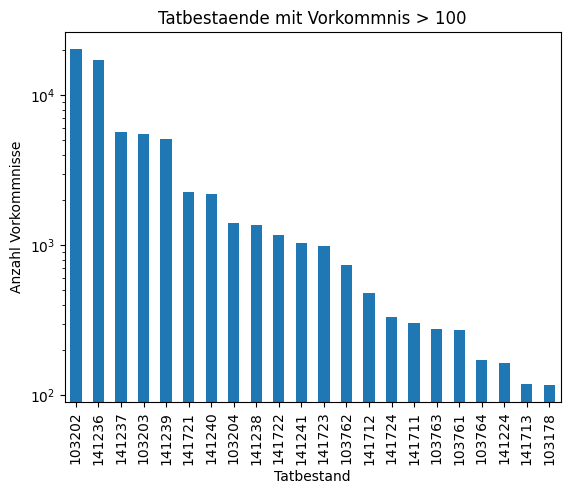

In [13]:
(df
 .Tatbestand
 .value_counts()
 .loc[lambda s: s > 100]
 .plot
 .bar(
     title="Tatbestaende mit Vorkommnis > 100",
     xlabel="Tatbestand", ylabel="Anzahl Vorkommnisse",
     logy=True,
 )
)

### Task 4: Collected fines

Compute the collected fines per hour of the day and month in two different ways and visualise the results in a suitable manner.

#### Collected fines per month

Using `groupby`

<Axes: title={'center': 'Collected Fines per Month'}, xlabel='Month', ylabel='Euros'>

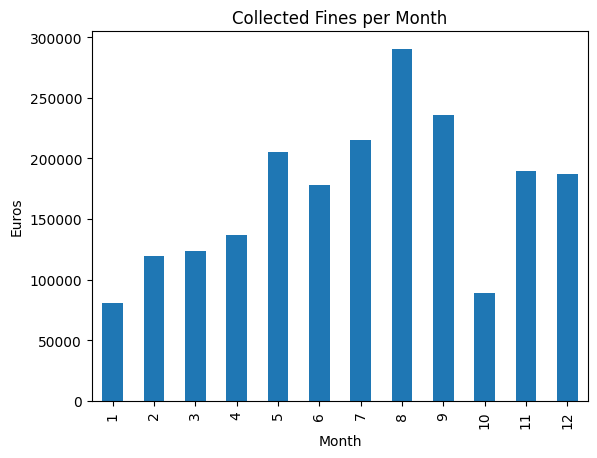

In [14]:
(df
 .groupby(df['Tattag_Zeit'].dt.month)
 ['Geldbuße']
 .agg('sum')
 .plot
 .bar(title="Collected Fines per Month", ylabel="Euros", xlabel="Month")
)


Using `pivot_table`

/tmp/ipykernel_396/1255817981.py:4: FutureWarning: The provided callable <function sum at 0x7f8ce4b21800> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .pivot_table(


<Axes: title={'center': 'Collected fines per month'}, xlabel='Month', ylabel='Euros'>

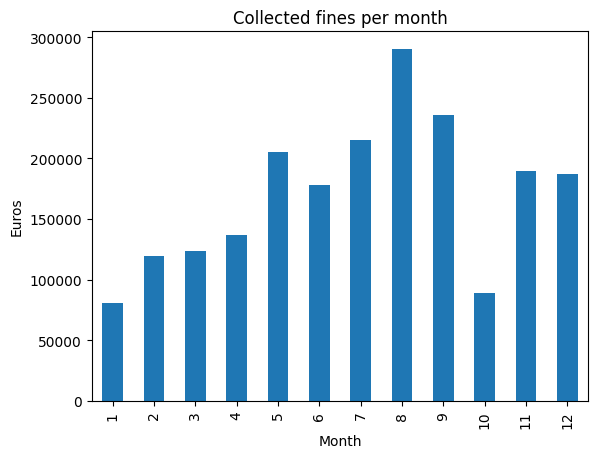

In [15]:
(df
 .set_index("Tattag_Zeit")
 .assign(month=lambda df_: df_.index.month)
 .pivot_table(
    index=["month"],
    values=["Geldbuße"],
    aggfunc=np.sum
 )
 .plot
 .bar(
     title="Collected fines per month", 
     ylabel="Euros", xlabel="Month", 
     legend=False
 )
)

#### Collected fines per hour of the day

Using `groupby`

<Axes: title={'center': 'Collected Fines per Hour of Day'}, xlabel='Hour', ylabel='Euros'>

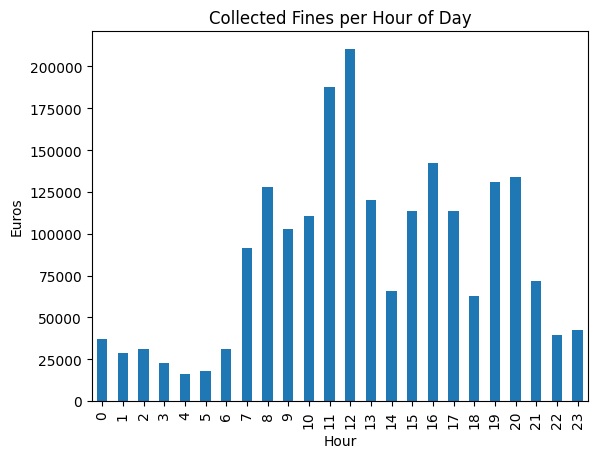

In [16]:
(df
 .groupby(df['Tattag_Zeit'].dt.hour)['Geldbuße']
 .agg('sum')
 .plot
 .bar(title="Collected Fines per Hour of Day", ylabel="Euros", xlabel="Hour")
)


Using `pivot_table`

/tmp/ipykernel_396/690639574.py:3: FutureWarning: The provided callable <function sum at 0x7f8ce4b21800> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .pivot_table(


<Axes: title={'center': 'Collected fines per hour of the day'}, xlabel='Hour', ylabel='Euros'>

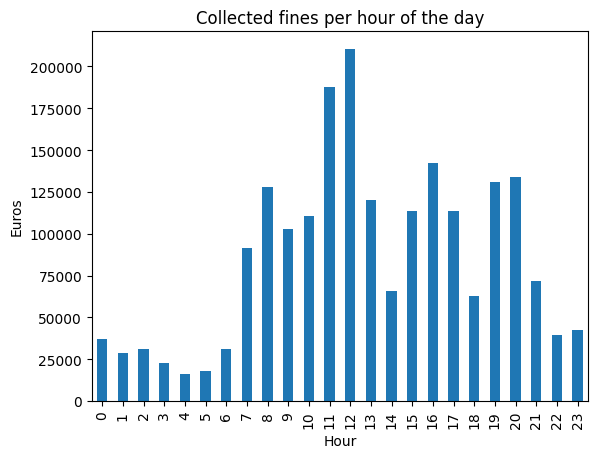

In [17]:
(df
 .assign(hourofday=lambda df_: df.Tattag_Zeit.dt.hour)
 .pivot_table(
     index=["hourofday"],
     values=["Geldbuße"],
     aggfunc=np.sum
 )
 .plot
 .bar(
     title="Collected fines per hour of the day",
     xlabel="Hour", ylabel="Euros",
     legend=False,
 )
)


### Task 5: What are the offence encodings that occur in *every* month of the year and how many of these are observed every month?

Using `groupby`

In [18]:
(df
 .groupby(df.Tattag_Zeit.dt.month)
 .Tatbestand
 .value_counts()
 .unstack()
 .dropna(axis=1)
 .astype(int)
)

Tatbestand   103178  103202  103203  103762  103763  103764  123624  141224  \
Tattag_Zeit                                                                   
1                 5    1214     328      53      29      17       6       1   
2                 9    1424     398      86      23      15      10       6   
3                 5    1617     449      62      31      13       8      18   
4                14    1575     435      67      22      20      10      12   
5                15    1699     443      50      25      14       4      10   
6                13    2125     561      77      17      19       7      20   
7                10    2380     658      58      33      17       6      25   
8                 7    2076     551      64      25      16      13      19   
9                14    2074     595      68      22      12      11      16   
10               13    1494     385      45      19       6       5       9   
11                8    1417     364      53      16       9       5      11   
12                4    1258     342      56      16      13       7      16   

Tatbestand   141236  141237  141239  141240  141712  141713  141714  141721  \
Tattag_Zeit                                                                   
1               582     207     325     127      21       2       1      44   
2               996     348     430     173      19      11       4     134   
3              1684     595     264      69      63      12       4      44   
4              1826     573     458     182      50       9       3      91   
5              1301     379     570     267      29       4       9     391   
6              1852     671     416     169      57      13       3     134   
7              1739     552     439     215      40       4       9     302   
8              1384     472     775     382      44      10       5     678   
9              1838     671     737     353      51      19       7     326   
10             1044     264     270     108      30      13       5      41   
11             1415     475     232      72      40       9       4      46   
12             1497     468     209      64      38      12       2      17   

Tatbestand   141722  141723  
Tattag_Zeit                  
1                26      13  
2                50      47  
3                17      20  
4                28      33  
5               208     188  
6                98      70  
7               142     128  
8               371     280  
9               181     162  
10               16      15  
11               19      31  
12               14       7

Using `set_index` and `resample`

In [19]:
(df
 .set_index("Tattag_Zeit")
 .resample("M")
 .Tatbestand
 .value_counts()
 .unstack()
 .dropna(axis=1)
 .astype(int)
)

/tmp/ipykernel_396/1545278662.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


Tatbestand   103178  103202  103203  103762  103763  103764  123624  141224  \
Tattag_Zeit                                                                   
2021-01-31        5    1214     328      53      29      17       6       1   
2021-02-28        9    1424     398      86      23      15      10       6   
2021-03-31        5    1617     449      62      31      13       8      18   
2021-04-30       14    1575     435      67      22      20      10      12   
2021-05-31       15    1699     443      50      25      14       4      10   
2021-06-30       13    2125     561      77      17      19       7      20   
2021-07-31       10    2380     658      58      33      17       6      25   
2021-08-31        7    2076     551      64      25      16      13      19   
2021-09-30       14    2074     595      68      22      12      11      16   
2021-10-31       13    1494     385      45      19       6       5       9   
2021-11-30        8    1417     364      53      16       9       5      11   
2021-12-31        4    1258     342      56      16      13       7      16   

Tatbestand   141236  141237  141239  141240  141712  141713  141714  141721  \
Tattag_Zeit                                                                   
2021-01-31      582     207     325     127      21       2       1      44   
2021-02-28      996     348     430     173      19      11       4     134   
2021-03-31     1684     595     264      69      63      12       4      44   
2021-04-30     1826     573     458     182      50       9       3      91   
2021-05-31     1301     379     570     267      29       4       9     391   
2021-06-30     1852     671     416     169      57      13       3     134   
2021-07-31     1739     552     439     215      40       4       9     302   
2021-08-31     1384     472     775     382      44      10       5     678   
2021-09-30     1838     671     737     353      51      19       7     326   
2021-10-31     1044     264     270     108      30      13       5      41   
2021-11-30     1415     475     232      72      40       9       4      46   
2021-12-31     1497     468     209      64      38      12       2      17   

Tatbestand   141722  141723  
Tattag_Zeit                  
2021-01-31       26      13  
2021-02-28       50      47  
2021-03-31       17      20  
2021-04-30       28      33  
2021-05-31      208     188  
2021-06-30       98      70  
2021-07-31      142     128  
2021-08-31      371     280  
2021-09-30      181     162  
2021-10-31       16      15  
2021-11-30       19      31  
2021-12-31       14       7